# 1.Setup

## 1.1 Install Dependencies

In [3]:
!pip install tensorflow==2.12.0 tensorflow_gpu==2.4.1 opencv-python matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow_gpu==2.4.1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.12.0)
ERROR: No matching distribution found for tensorflow_gpu==2.4.1


## 1.2 Import Dependencies

In [1]:
# import standard dependecies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt




In [2]:
#import tenserflow dependencies
from tensorflow.keras.models import Model #Import Model class
from tensorflow.keras.layers import Layer, Conv2D,Dense,MaxPooling2D, Input, Flatten
import tensorflow as tf

C:\Users\msi\anaconda3\envs\ev_2\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1.3 Set GPU Growth

In [3]:
# Avoid Out of Memoy Error by setting Memory consumption Growth
#access all the gpus in the machine
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    #setting memory growth
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.4 Create Folder Structures

In [4]:
# setUp Paths (deffining)
POS_PATH=os.path.join('data','positive')#join diff directory 
NEG_PATH=os.path.join('data','negative')
ANC_PATH=os.path.join('data','anchor')


In [9]:
#create the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\negative'

# 2 Collect Positives and Anchors

## 2.1 Unpack Labelled Faces in the wild Dataset(Negative images)

In [ ]:
#https://vis-www.cs.umass.edu/lfw/(negative images)

In [24]:
# Uncompress Tar GZ lebelled Faces in the wild DataSet
!tar -xf lfw.gz

In [36]:
#Move the lfw dataset to negative dataset folder
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw',directory)):
        EX_path=os.path.join('lfw',directory,file)#existing path
        NEW_path=os.path.join(NEG_PATH,file)
        os.replace(EX_path,NEW_path)

## 2.2 Collect Positive and Anchor Images

In [5]:
# import uuid library to generate unique id for images
import uuid

In [56]:
#Establish a connection to the webcam
cap= cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame=cap.read()
    
    # X axis will start at 120Pixels and end up at  120+250 =>to have a shape of 250*250 
    frame=frame[120:120+250,200:200+250,:]
    
    
    
    #collect anchors
    if cv2.waitKey(1) & 0XFF == ord('a'):
        #create unique file path
        imgname= os.path.join(ANC_PATH,'{}.jpg'.format(uuid.uuid1()))
        #save the image in the file
        cv2.imwrite(imgname,frame)
    
    

    
    #collect Positive Images
    if cv2.waitKey(1) & 0XFF == ord('p'):
        imgname=os.path.join(POS_PATH,'{}.jpg'.format(uuid.uuid1()))
        #save postive images to file
        cv2.imwrite(imgname,frame)
        

    
    
    #show the image back to screen
    cv2.imshow('Image Collection',frame)
    #breaking when press 'q'
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
#Release and close the webcam
cap.release()
cv2.destroyAllWindows()

## 2.x NEW Data Augmentation to perform the model

In [58]:
def data_aug(img):
    data=[]
#we are going to have 10 additional images for every originally single image
    for i in range(9):
         
        #img=tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1.2))
        img=tf.image.stateless_random_contrast(img,lower=0.6,upper=1,seed=(1,3))
        img=tf.image.stateless_random_flip_left_right(img,seed=(np.random.randint(100),np.random.randint(100)))
        img=tf.image.stateless_random_jpeg_quality(img,min_jpeg_quality=90,max_jpeg_quality=100,seed=(np.random.randint(100),np.random.randint(100)))
        img=tf.image.stateless_random_saturation(img,lower=0.9,upper=1,seed=(np.random.randint(100),np.random.randint(100)))
        
        data.append(img)
    return data

### tester data augmentation pour un exemple d'image

In [54]:
#tester data augmentation pour un exemple d'image
import os
img_path=os.path.join(ANC_PATH,"929a82a3-b1a5-11ee-8bce-d8f8839e51ff.jpg")
img=cv2.imread(img_path)
augmented_img=data_aug(img)

for image in augmented_img:
    cv2.imwrite(os.path.join(ANC_PATH,'{}.jpg'.format(uuid.uuid1())),image.numpy())

### tester data augmentation pour all ANCHOR images


In [56]:
for file_image in os.listdir(os.path.join(ANC_PATH)):
    img_path=os.path.join(ANC_PATH,file_image)
    img=cv2.imread(img_path)
    augmented_img=data_aug(img)

    for image in augmented_img:
        cv2.imwrite(os.path.join(ANC_PATH,'{}.jpg'.format(uuid.uuid1())),image.numpy())

### tester data augmentation pour all POSITIVE images


In [59]:
for file_image in os.listdir(os.path.join(POS_PATH)):
    img_path=os.path.join(POS_PATH,file_image)
    img=cv2.imread(img_path)
    augmented_img=data_aug(img)

    for image in augmented_img:
        cv2.imwrite(os.path.join(POS_PATH,'{}.jpg'.format(uuid.uuid1())),image.numpy())

KeyboardInterrupt: 

## 3.Load and Preprocess Images

### 3.1 Get Images Directories

In [5]:
#obtain image directory (files)
#create a pipline for all the diff files
anchor=tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(3000)
positive=tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(3000)
negative=tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(3000)

In [6]:
#access the iterator
dir_test=anchor.as_numpy_iterator()
#the full path to a specific image
dir_test.next() #next element at the pipline

b'data\\anchor\\a52168a4-bfbb-11ee-a2c4-d8f8839e51fc.jpg'

### 3.2 Preprocessing_ Scale and Resize

In [7]:
# Create a preprocessing Pipline 

def preprocess(file_path):
    
    byte_img=tf.io.read_file(file_path)#load/read the img from the file
    img=tf.image.decode_jpeg(byte_img)#decode the jpg img
    
    #preprocessing steps
    img=tf.image.resize(img,(105,105))#resize the img to 105*105*3
    img=img/255.0 #scale img
    return img

1.0

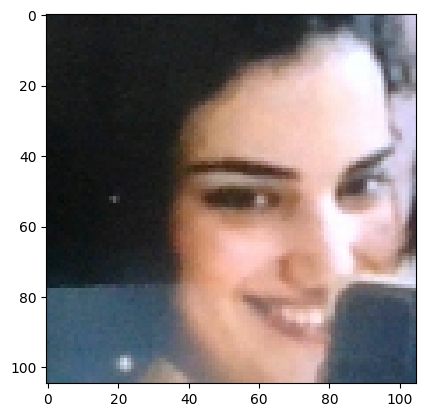

In [77]:
img=preprocess('data\\anchor\\b15e5c0b-b1a5-11ee-aea0-d8f8839e51ff.jpg')
plt.imshow(img)
img.numpy().max()

### 3.3 Create Labelled Dataset

In [78]:
#create positive and negative exemples

#(anchor,positive) => 1,1,1,1,1  positive class
#(anchor,negative) => 0,0,0,0  Negative class

In [8]:
#zip allows us to iterate through all the tree at the same time
positives=tf.data.Dataset.zip( (anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives=tf.data.Dataset.zip((anchor,negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data=positives.concatenate(negatives)

In [80]:
#data contain (anchor),(positive or negative),(1 or 0)
data

<ConcatenateDataset shapes: ((), (), ()), types: (tf.string, tf.string, tf.float32)>

In [81]:
samples=data.as_numpy_iterator()
samples.next()


(b'data\\anchor\\ea3ff2a9-bfa7-11ee-8f6f-d8f8839e51fc.jpg',
 b'data\\positive\\9a219b84-bfbb-11ee-92db-d8f8839e51fc.jpg',
 1.0)

### 3.4 Build Train and Test Partition

In [9]:
#write a function to process a twin

def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)
    


In [10]:
# build data pipeline

data=data.map(preprocess_twin)#run the preprocess_twin function
data=data.cache()# cache our images 
data=data.shuffle(buffer_size=10000) # shuffled our images to have mixed set of ex

In [97]:
data

<ShuffleDataset shapes: ((105, 105, None), (105, 105, None), ()), types: (tf.float32, tf.float32, tf.float32)>

In [85]:
sample=data.as_numpy_iterator()
len(sample.next())

3

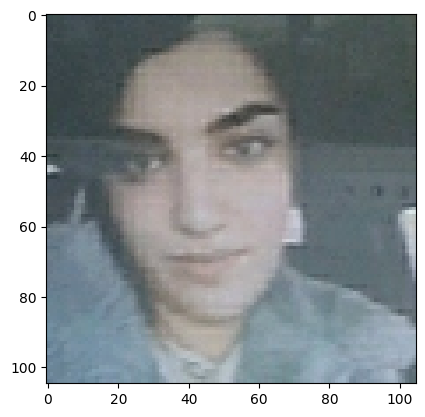

In [86]:
plt.imshow(sample.next()[1])

In [87]:
sample.next()[2]

0.0

In [64]:
data

<ShuffleDataset shapes: ((105, 105, None), (105, 105, None), ()), types: (tf.float32, tf.float32, tf.float32)>

In [11]:
#train Partition
train_data=data.take(round(len(data)*0.7)) #70% trainning
train_data=train_data.batch(16)#batch size 16
train_data=train_data.prefetch(8)#start preprocessing the 8 next images so we don't bottleneck our neural network when we go and train.


In [65]:
train_data

<PrefetchDataset shapes: ((None, 105, 105, None), (None, 105, 105, None), (None,)), types: (tf.float32, tf.float32, tf.float32)>

In [ ]:
#16 images will be processed at the same time

In [12]:
#Testing Partition
test_data=data.skip(round(len(data)*0.7))# skip 70% 
test_data=test_data.take(round(len(data)*0.3)) #took 30%
test_data=test_data.batch(16)#batch size 16
test_data=test_data.prefetch(8)

## 4 Model Engineering

## 4.1 Build Embedding Layer

In [13]:
# Build our neural Network pipeline=>translating our input image to feature vector
def make_embedding():
    # Create Input Layer
    inp=Input(shape=(105,105,3), name='input_image')
    
    # First Block
    c1= Conv2D(64,(10,10),activation='relu')(inp)
    m1=MaxPooling2D(64,(2,2),padding='same')(c1)
    
    # Second Block
    c2= Conv2D(128,(7,7),activation='relu')(m1)
    m2=MaxPooling2D(64,(2,2),padding='same')(c2)
    
    # 3 Block
    c3= Conv2D(128,(4,4),activation='relu')(m2)
    m3=MaxPooling2D(64,(2,2),padding='same')(c3)
    
    # final Enbedding Block
    c4= Conv2D(256,(4,4),activation='relu')(m3)
    f1=Flatten()(c4) #get single D
    #final Layer
    d1=Dense(4096,activation='sigmoid')(f1)#4096 Feature vector
    
    
    return Model(inputs=[inp] ,outputs=[d1], name='embedding')

In [14]:
embedding=make_embedding()

In [15]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 105, 105, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 64)        19264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 128)       401536    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 128)       262272    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0 

## 4.2 Build L1 Siamese Distance Layer

In [16]:
#create Siamese L1 distance Class (in order to subtract output of the embedding images) 
#Let's create a new class for our custom layer
class L1Dist(Layer):
    #define the base init method inside of a python class - inheritance
    def __init__(self,**kwargs):
        super().__init__()
        
        
        
    #call function is responsible for telling what to do when some data is passed to it    
    def call(self,input_embedding, validation_embedding):
        # similarity Calculation       
        return tf.math.abs(input_embedding - validation_embedding)
        

## 4.3 Make Siamese Model

In [17]:

def make_Siamese_model():
    #Handle inputs
    #anchor image input in the network
    input_image=Input(name="input_img",shape=(105,105,3))
    
    #validation image input in the network
    validation_image=Input(name="validation_img",shape=(105,105,3))
    
    #pass the input images to the embedding layer
    input_embedding=embedding(input_image)
    validation_embedding=embedding(validation_image)
    
    #distance Layer
    l1=L1Dist()
    distances=l1(input_embedding,validation_embedding)
    
    #combine the distances into a final fuuly connected Layer
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image,validation_image],outputs=classifier,name="SiameseNetwork")

In [18]:
Model=make_Siamese_model()
Model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 105, 105, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 105, 105, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
l1_dist (L1Dist)                (None, 4096)         0           embedding[0][0]     

## 5 Trainning the Model

### 5.1 SetUp Loss and Optimizer

In [19]:
#define the Loss Function
binary_cross_loss=tf.keras.losses.BinaryCrossentropy()#we can add parm from_logits=True it is recommended when the inputs to the loss finction are not normalized



In [20]:
#define the optimizer
opt=tf.keras.optimizers.Adam(0.0001)#learning rate is 0.0001

### 5.2 Establish Checkpoints callbacks

In [21]:
#set Up checkpoint components

#define checkpoint dir to save all checkpoints
checkpoint_dir='./training_checkpoints'

#prefix all the checkpoint with ckpt format 
checkpoint_prefix=os.path.join(checkpoint_dir,'ckpt')

#define checkpoint Class
checkpoint=tf.train.Checkpoint(opt=opt,Model=Model)

#to reload the pre trained weights into the existing model we can use mode.load('path_to_checkpoints')

### 5.3 Build Train Step Function


In [22]:
#define what happen when we train a single batch OF data

#defining the actual training step

@tf.function #allow faster execution
def train_step(batch):
    
    #capturing gradients from the neural network(calculating our differentiation)
    #capturing what happen inside the neural network
    with tf.GradientTape() as tape:
        
        #Get anchor and positive/negative images
        X= batch[:2] #extracting our batchs
        #Get Label
        y= batch[2]
        
        
        #pass batch to siamese neural network
        y_pred = Model(X, training=True) #training=True to activate certain layer
        #calculate loss
        loss=binary_cross_loss(y,y_pred)
    
    
    #calculate all the gradients four diff weights
    grad=tape.gradient(loss,Model.trainable_variables)#calculate the gradient for all the different trainable variable
    
    
    #update weights
    #calculate new weights and apply it to the model
    opt.apply_gradients(zip(grad,Model.trainable_variables))
    return loss










### 5.4 define Trainnig Loop

In [23]:
#Import metrics Calculations
from tensorflow.keras.metrics import Precision,Recall

In [24]:
#applaying trainning steps for each epoch

def train(data,EPOCHS):
    
    #loop through the epochs
    for epoch in range(1, EPOCHS + 1):
        print("\n Epoch {}/{}".format(epoch,EPOCHS))
        #define progress bar
        progbar=tf.keras.utils.Progbar(len(data))  #increment evey batch
        
        #creating a metric object
        r=Recall()
        p=Precision()
    
        #loop through each batch
        for idx,batch in enumerate(data): #(counter,actual batch)
            
            #run train step 
            loss=train_step(batch)
            yhat=Model.predict(batch[:2])
            r.update_state(batch[2],yhat)
            p.update_state(batch[2],yhat)
            progbar.update(idx+1) #every time a batch is train progress bar is updated
        print("loss= {}, recall= {}, Precision= {} ".format(loss.numpy(),  r.result().numpy(),   p.result().numpy()))
        #save checkpoint evey 10 epochs
        if epoch % 10==0:
             checkpoint.save(file_prefix=checkpoint_prefix)



### 5.5 Train the Entire Model

In [25]:
EPOCHS=50
train(train_data,EPOCHS)


 Epoch 1/50
263/263 [==============================] - 174s 577ms/step
loss= 0.09558246284723282, recall= 0.8728652596473694, Precision= 0.9776833057403564 

 Epoch 2/50
263/263 [==============================] - 147s 559ms/step
loss= 0.9677596092224121, recall= 0.9690476059913635, Precision= 0.9854721426963806 

 Epoch 3/50
263/263 [==============================] - 148s 564ms/step
loss= 0.010379765182733536, recall= 0.9650283455848694, Precision= 0.9714557528495789 

 Epoch 4/50
263/263 [==============================] - 145s 550ms/step
loss= 0.09858343750238419, recall= 0.9797265529632568, Precision= 0.9801886677742004 

 Epoch 5/50
263/263 [==============================] - 144s 547ms/step
loss= 0.0687076523900032, recall= 0.9867235422134399, Precision= 0.986255943775177 

 Epoch 6/50
263/263 [==============================] - 144s 547ms/step
loss= 0.02892053686082363, recall= 0.9933333396911621, Precision= 0.9876893758773804 

 Epoch 7/50
263/263 [==============================] 

## 6.Evaluate Model

### 6.1 Import Matrics

In [26]:
#import metric calculations
from tensorflow.keras.metrics import Precision, Recall

### 6.2 Make Predictions

In [27]:
#Get a batch of test data(eachh batch contain 16 exemples inputs )
test_input, test_val, y_true = test_data.as_numpy_iterator().next()#convert our test data into numpy array

In [28]:
#Make Predictions
y_hat = Model.predict([test_input,test_val])
y_hat

array([[1.22159676e-04],
       [3.33190724e-06],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99998808e-01],
       [9.99982953e-01],
       [2.10594753e-05],
       [9.99999642e-01],
       [9.99666452e-01],
       [7.48872750e-08],
       [2.47367154e-07],
       [2.13961175e-04],
       [1.15328185e-05],
       [9.99746740e-01],
       [1.05033459e-05],
       [9.18949246e-01]], dtype=float32)

In [31]:
# Post Processing the results set a threshold 
[1 if prediction > 0.5 else 0 for prediction in y_hat]

[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [32]:
y_true

array([0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

## 6.3 Calculate Metrics

In [29]:
#creating a metric object 
m= Recall()
#calculating the recall value
m.update_state(y_true,y_hat)
#return recall result
m.result().numpy()

1.0

In [30]:
m=Precision()
m.update_state(y_true,y_hat)
m.result().numpy()

1.0

In [31]:
r=Recall()
p=Precision()
for test_input,test_val,y_true in test_data.as_numpy_iterator():
    yhat=Model.predict([test_input,test_val])
    r.update_state(y_true,yhat)
    p.update_state(y_true,yhat)
    
print( r.result().numpy(),   p.result().numpy())


1.0 0.9978261


### Note:
here we are evaluating our model only on a single Batch the best practice is to evaluate it over the entire test samples

## 6.4 Visualize Results

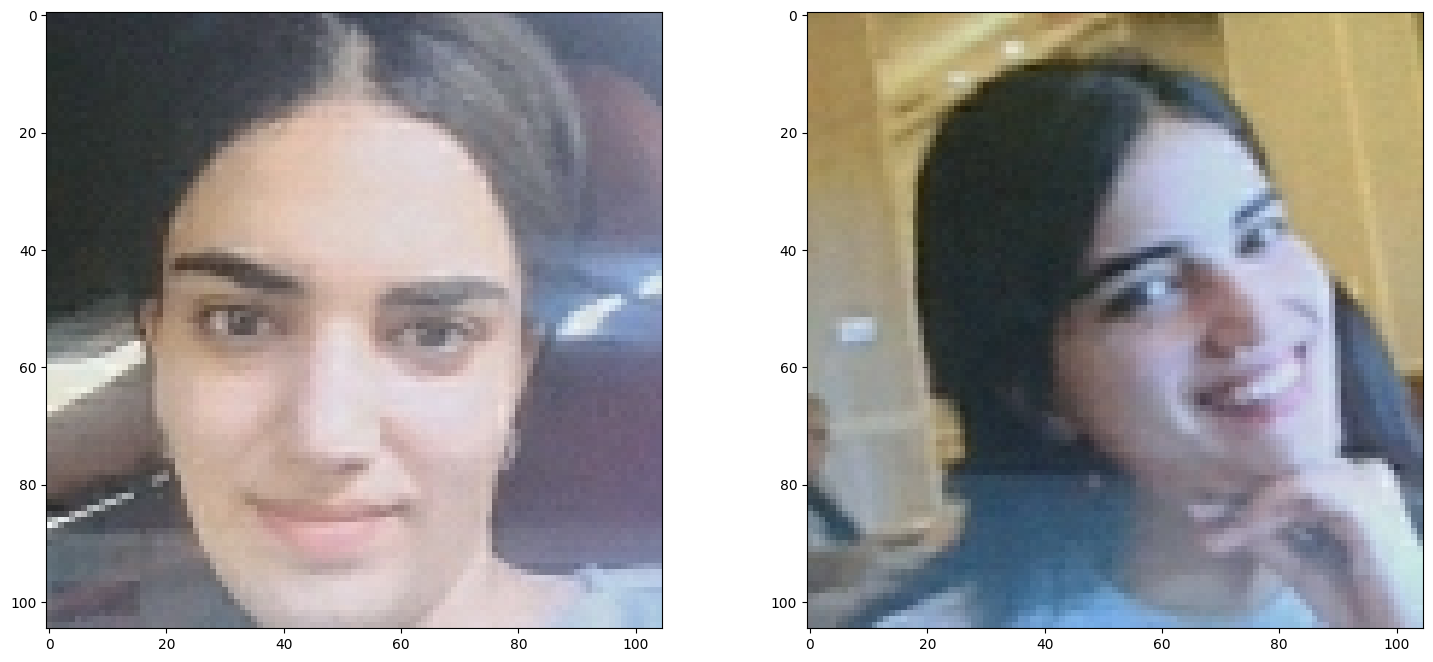

In [34]:
#compare results for differents samples in our batch

#set plot size
plt.figure(figsize=(18,8))
#set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])
plt.subplot(1,2,2)
plt.imshow(test_val[0])
plt.show()

In [33]:
y_true[0]
#the two people do not match

1.0

### 7 Save the model

In [35]:
#save the weights
Model.save('siamesemodelV2.h5')

#### Notes: it's important to load up the custom object also

In [40]:
#reload model 
model2=tf.keras.models.load_model('siamesemodelV2.h5', 
                                 custom_objects={'L1Dist':  L1Dist,'BinaryCrossentropy':tf.keras.losses.BinaryCrossentropy})


## 8.Real Time Test

## 8.1 Verification Function

In [44]:

def verify(model, detection_threshold,  verification_threshold):
    
    #build a result array
    results=[]
    
    
    #looping through every single image inside the verification image folder
    for image in os.listdir(os.path.join('application_data','verification_images')):
        #grab an input img from the webcam and store it in the input folder and call it input_image.jpg        
        input_img = preprocess(os.path.join('application_data','input_image','input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data','verification_images',image))
        
        #make pred
        #wrapping data into list (encapsuler data) because we've only got a single sample(1 seul echantillon)
        result = model2.predict(list(np.expand_dims([input_img,validation_img],axis=1)))
        results.append(result)
        
        
    #detection threshold: Metrics above which a prediction is considered positive (matches)
    
    #how many positive prediction are actually passing the detection thres
    detection = np.sum(np.array(results)> detection_threshold) 
        
        
    # verification threshold:the proportion of positve pred /total positive samples
    
    verification=detection / len(os.listdir(os.path.join('application_data','verification_images')))
    verified=verification > verification_threshold #this return true or false
        
    return results,verified

## 8.2 OpenCV Real Time Verification

In [ ]:
cap= cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame= cap.read()
    frame=frame[120:120+250,200:200+250,:]

    cv2.imshow("Verification",frame)
    
   #verification trigvvqger(declenchement)
    if cv2.waitKey(10)& 0xff==ord('v'):
        #save the input image to application_data/input_image folder
        cv2.imwrite(os.path.join('application_data','input_image','input_image.jpg'),frame)
        #verification function
        results,verified=verify(model,0.5,0.8)
        print(verified)
    if cv2.waitKey(10)& 0xff==ord('q'):
        break
        
        
        
cap.release()
cv2.destroyAllWindows()

False
False
True
False
True
True
True
True
True
False
False
False
False
False
False
False


In [34]:
np.sum(np.squeeze(results)>0.9) #detection thre

62

In [30]:
63/71 #verification

0.8873239436619719